In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import time
import quandl
import datetime
from sklearn.preprocessing import  MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

# univariate mlp example
from numpy import array
from keras.models import Sequential
from keras.layers import Dense, LSTM
import pickle

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

# own development
from library import get_data, normalize

j:\Anaconda3\envs\keras2\lib\site-packages\sklearn\utils\fixes.py:313: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  _nan_object_mask = _nan_object_array != _nan_object_array
Using TensorFlow backend.


In [2]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [3]:
quandl.connection.ApiConfig.api_key= "_N85bWLCNCWz14smKHSi"

In [4]:
start = datetime.datetime(2009, 1, 1)
end = datetime.datetime(2019, 1, 1)
tesla = quandl.get('WIKI/TSLA',start_date=start,end_date=end)

In [5]:
raw_seq=tesla['Adj. Close'].values

In [6]:
raw_seq[-3:]

array([ 301.54,  304.18,  279.18])

In [7]:
# choose a number of time steps
n_steps = 5
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [8]:
raw_seq=tesla['Adj. Close'].values

In [9]:
raw_seq.shape

(1949,)

In [10]:
X, y = split_sequence(raw_seq, n_steps)

In [11]:
X.shape , y.shape

((1944, 5), (1944,))

In [12]:
train_size = int(len(X) * 0.80)
X_train, X_test = X[0:train_size], X[train_size:len(X)]
y_train, y_test = y[0:train_size], y[train_size:len(X)]

In [15]:
X = X_train.reshape((X_train.shape[0], X_train.shape[1], n_features))

In [17]:
X.shape, y_train.shape

((1555, 5, 1), (1555,))

In [18]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [19]:
history=model.fit(X, y_train, epochs=500, verbose=2, validation_split=0.15, shuffle=False)

Train on 1321 samples, validate on 234 samples
Epoch 1/500
 - 3s - loss: 211.5094 - val_loss: 93.1976
Epoch 2/500
 - 0s - loss: 54.2982 - val_loss: 102.8818
Epoch 3/500
 - 0s - loss: 46.9953 - val_loss: 101.5060
Epoch 4/500
 - 0s - loss: 36.1676 - val_loss: 67.9826
Epoch 5/500
 - 0s - loss: 46.4485 - val_loss: 92.3175
Epoch 6/500
 - 0s - loss: 40.1578 - val_loss: 76.2407
Epoch 7/500
 - 0s - loss: 55.1402 - val_loss: 80.8204
Epoch 8/500
 - 0s - loss: 65.1023 - val_loss: 116.4194
Epoch 9/500
 - 0s - loss: 87.4832 - val_loss: 85.3382
Epoch 10/500
 - 0s - loss: 57.8778 - val_loss: 102.8701
Epoch 11/500
 - 0s - loss: 33.6638 - val_loss: 88.8668
Epoch 12/500
 - 0s - loss: 42.6978 - val_loss: 93.9741
Epoch 13/500
 - 0s - loss: 41.2340 - val_loss: 64.3185
Epoch 14/500
 - 0s - loss: 60.3736 - val_loss: 114.1965
Epoch 15/500
 - 0s - loss: 38.1099 - val_loss: 79.9181
Epoch 16/500
 - 0s - loss: 41.6456 - val_loss: 87.3038
Epoch 17/500
 - 0s - loss: 37.9515 - val_loss: 75.6164
Epoch 18/500
 - 0s - 

 - 0s - loss: 18.8411 - val_loss: 34.3395
Epoch 149/500
 - 0s - loss: 18.8336 - val_loss: 35.9311
Epoch 150/500
 - 0s - loss: 20.3516 - val_loss: 38.4568
Epoch 151/500
 - 0s - loss: 23.6830 - val_loss: 57.5777
Epoch 152/500
 - 0s - loss: 19.2925 - val_loss: 33.5980
Epoch 153/500
 - 0s - loss: 22.8467 - val_loss: 57.4594
Epoch 154/500
 - 0s - loss: 19.2712 - val_loss: 32.9747
Epoch 155/500
 - 0s - loss: 19.7748 - val_loss: 43.5763
Epoch 156/500
 - 0s - loss: 19.1863 - val_loss: 39.6048
Epoch 157/500
 - 0s - loss: 19.0320 - val_loss: 36.9850
Epoch 158/500
 - 0s - loss: 19.7911 - val_loss: 44.6930
Epoch 159/500
 - 0s - loss: 18.6811 - val_loss: 34.3426
Epoch 160/500
 - 0s - loss: 19.4778 - val_loss: 41.9941
Epoch 161/500
 - 0s - loss: 20.1783 - val_loss: 46.0464
Epoch 162/500
 - 0s - loss: 19.8400 - val_loss: 43.3791
Epoch 163/500
 - 0s - loss: 19.7481 - val_loss: 43.9862
Epoch 164/500
 - 0s - loss: 19.8626 - val_loss: 35.7472
Epoch 165/500
 - 0s - loss: 23.9756 - val_loss: 58.0773
Epoch 

Epoch 295/500
 - 0s - loss: 19.0920 - val_loss: 36.9766
Epoch 296/500
 - 0s - loss: 19.1538 - val_loss: 41.0135
Epoch 297/500
 - 0s - loss: 19.1635 - val_loss: 42.5707
Epoch 298/500
 - 0s - loss: 19.3053 - val_loss: 43.6925
Epoch 299/500
 - 0s - loss: 19.3016 - val_loss: 41.9971
Epoch 300/500
 - 0s - loss: 18.9432 - val_loss: 40.3874
Epoch 301/500
 - 0s - loss: 19.8744 - val_loss: 47.6717
Epoch 302/500
 - 0s - loss: 19.0633 - val_loss: 38.4200
Epoch 303/500
 - 0s - loss: 19.3621 - val_loss: 42.1735
Epoch 304/500
 - 0s - loss: 18.9135 - val_loss: 41.1524
Epoch 305/500
 - 0s - loss: 18.9142 - val_loss: 39.6419
Epoch 306/500
 - 0s - loss: 19.4942 - val_loss: 38.6337
Epoch 307/500
 - 0s - loss: 22.1877 - val_loss: 35.3816
Epoch 308/500
 - 0s - loss: 33.7883 - val_loss: 71.2803
Epoch 309/500
 - 0s - loss: 36.9552 - val_loss: 68.2982
Epoch 310/500
 - 0s - loss: 24.5613 - val_loss: 37.9943
Epoch 311/500
 - 0s - loss: 21.9405 - val_loss: 44.0990
Epoch 312/500
 - 0s - loss: 20.3975 - val_loss: 

Epoch 442/500
 - 0s - loss: 18.2974 - val_loss: 35.3221
Epoch 443/500
 - 0s - loss: 19.1785 - val_loss: 42.3796
Epoch 444/500
 - 0s - loss: 18.7995 - val_loss: 35.6389
Epoch 445/500
 - 0s - loss: 19.3492 - val_loss: 38.1967
Epoch 446/500
 - 0s - loss: 18.6498 - val_loss: 35.1866
Epoch 447/500
 - 0s - loss: 18.6288 - val_loss: 38.3403
Epoch 448/500
 - 0s - loss: 18.2770 - val_loss: 34.9495
Epoch 449/500
 - 0s - loss: 18.6844 - val_loss: 39.3511
Epoch 450/500
 - 0s - loss: 18.3039 - val_loss: 34.6780
Epoch 451/500
 - 0s - loss: 18.6322 - val_loss: 39.1314
Epoch 452/500
 - 0s - loss: 18.1938 - val_loss: 35.3669
Epoch 453/500
 - 0s - loss: 19.1523 - val_loss: 42.1463
Epoch 454/500
 - 0s - loss: 18.5510 - val_loss: 36.5127
Epoch 455/500
 - 0s - loss: 18.8338 - val_loss: 35.1902
Epoch 456/500
 - 0s - loss: 18.2958 - val_loss: 33.9272
Epoch 457/500
 - 0s - loss: 18.2401 - val_loss: 37.2165
Epoch 458/500
 - 0s - loss: 18.8844 - val_loss: 39.9067
Epoch 459/500
 - 0s - loss: 18.6852 - val_loss: 

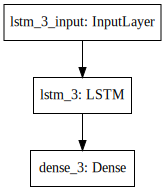

In [20]:
SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [21]:
mytime = time.strftime("%Y_%m_%d_%H_%M")
modname = 'LTSM_uni_tesla' + mytime 

In [22]:
#H:\Dropbox\python\deep_learning_time_series_forecasting\code
with open('H:\Dropbox\python\deep_learning_time_series_forecasting\code\histories\\'
          + modname + '.pkl' , 'wb') as file_pi:
    pickle.dump(history.history, file_pi)

(0, 100)

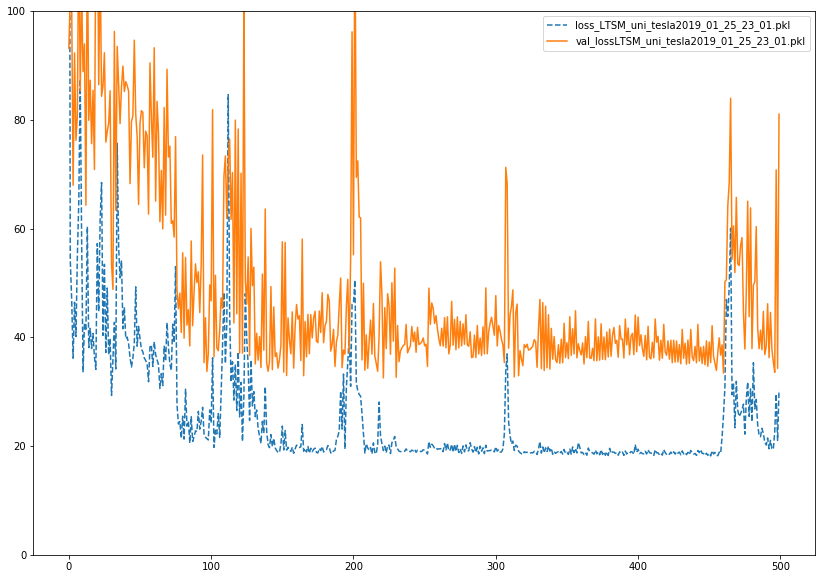

In [23]:
histories = ['LTSM_uni_tesla2019_01_25_23_01.pkl']
plt.figure(figsize=(14,10))
for val in histories:
    with open('H:\Dropbox\python\deep_learning_time_series_forecasting\code\histories\\' + val , 'rb') as file_pi:
        thepickle = pickle.load(file_pi)
        plt.plot(thepickle["loss"],label ='loss_' + val,linestyle='--')
        plt.plot(thepickle["val_loss"],label='val_loss' + val)


plt.legend()
plt.ylim(0, 100)

In [24]:
X_t = X_test.reshape((X_test.shape[0], X_test.shape[1], n_features))

In [25]:
yhat = model.predict(X_t, verbose=2)

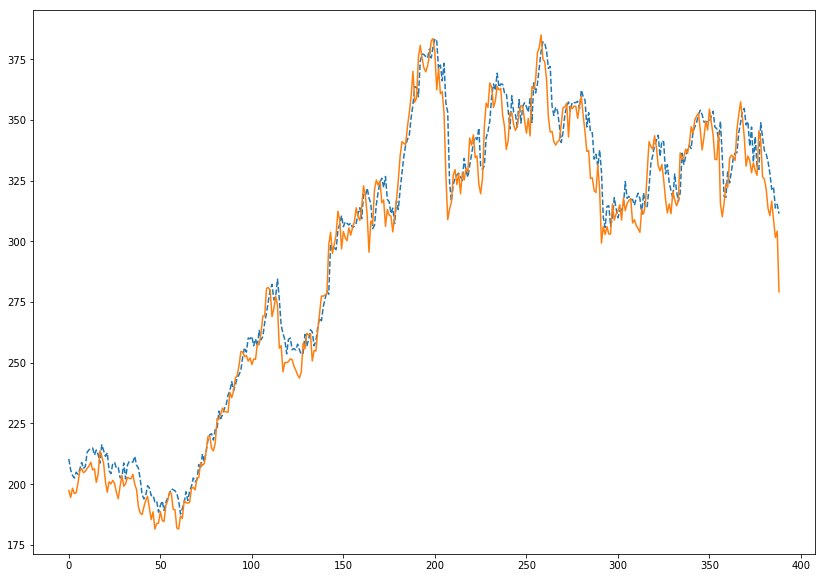

In [26]:
plt.figure(figsize=(14,10))
#plt.plot(raw_seq,label ='original' )
plt.plot(yhat,label ='prediction' ,linestyle='--')
plt.plot(y_test,label='real' )

In [27]:
from sklearn.metrics import r2_score, mean_squared_error

In [28]:
r2_score(y_test, yhat) 

0.97355367256304115

In [29]:
mean_squared_error(y_test, yhat) 

92.608956990018214

In [92]:
test=y_test[-4:-1]

In [93]:
test

array([ 317.29,  311.64,  315.36])

In [94]:
y_test[-5:]

array([ 325.2 ,  317.29,  311.64,  315.36,  311.35])

In [96]:
test=test.reshape(1,3)

In [97]:
y = model.predict(test, verbose=2)

In [98]:
y


array([[ 316.6600647]], dtype=float32)